Real Estate Price Prediction End to End Project

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [343]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [344]:
df1.shape

(13320, 9)

In [345]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [346]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [347]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [348]:
df2 = df1.drop(columns={'area_type','availability','society','balcony'})

In [349]:
# Checking null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [355]:
df3=df2.dropna()

In [356]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [357]:
df3.shape

(13246, 5)

# Feature Engineering

In [358]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [359]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [360]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [361]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [362]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [363]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [364]:
# Taking care of Range values in Total_sqft feature
import re
def range_cal(x):
    values = x.split('-')
    if len(values) ==2:
        return ((float(values[0])+float(values[1]))/2)
    try:
        """
        if re.search('Acres', x):
            a=(re.findall('[0-9.]+',x))
            return (float(a[0])*43560)
        if re.search('Sq', x):
            a=(re.findall('[0-9.]+',x))
            return (float(a[0])*10.7639)
        if re.search('Perch', x):
            a=(re.findall('[0-9.]+',x))
            return (float(a[0])*272.25)    
        if type(float(x)) ==float:
            return float(x)
        """
        return float(x)
        
        
    except:               
        return None
        

In [365]:
df4=df3.copy()
df4['sqft'] = df4['total_sqft'].apply(range_cal)

In [366]:
df4.dropna(inplace=True)

In [375]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
sqft          0
dtype: int64

Feature Engineering

In [376]:
#df3.drop('total_sqft',axis=1,inplace=True)
df5 =df4.copy()
df5['price_per_sqft'] = (df5['price']*100000)/df5['sqft']
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [377]:
df5['location'].nunique()  

1298

In [384]:
df5['location'] = df5['location'].apply(lambda x:x.strip()) # remove additional spaces
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [385]:

location_stat_less_10 = location_stats[location_stats<=10]
len(location_stats[location_stats<=10])

1047

In [386]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stat_less_10 else x)

In [387]:
df5['location'].nunique()

241

In [388]:
df5.drop('size',axis=1,inplace=True)
df5.head(10)

,location,total_sqft,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,1170,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,2732,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,3300,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,1310,3.0,63.25,3,1310.0,4828.244275
9,other,1020,6.0,370.00,6,1020.0,36274.509804


In [389]:
# Analyzing bhk vs sqft feature
df5.groupby('bhk')['sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
bhk,,,,,,,,
1,640.0,751.915984,1129.435795,15.0,539.75,645.0,745.50,26136.0
2,5517.0,1138.372555,248.950891,276.0,1030.00,1143.0,1230.00,8840.0
3,4818.0,1676.298535,1044.882909,11.0,1365.00,1570.0,1808.00,52272.0
4,1390.0,2707.042245,1917.003895,1.0,1500.00,2500.0,3435.75,36000.0
5,349.0,2387.759570,1779.189843,24.0,1200.00,1800.0,3000.00,10000.0
6,220.0,2044.463500,2348.013118,499.0,1075.00,1365.0,2400.00,30400.0
7,100.0,2309.750000,1986.229118,5.0,1200.00,1625.0,2818.75,12000.0
8,88.0,1922.056818,1637.871652,600.0,1146.25,1200.0,2425.00,12000.0
9,52.0,2928.557692,5702.493340,600.0,1200.00,1440.0,3225.00,42000.0


In [390]:

df6 = df5[~(df5['sqft']/df5['bhk'] < 300)]
df6

,location,total_sqft,bath,price,bhk,sqft,price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0,6689.834926
13316,other,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0,10407.336319


In [391]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [392]:
# for each location removing the outlier which lies above and below 1 SD
def remove_loc_outliers(df):
    df_out = pd.DataFrame()
    for loc,sub_df in df6.groupby('location'):
        m = np.mean(sub_df['price_per_sqft'])
        std_dev = np.std(sub_df['price_per_sqft'])
        df_temp = sub_df[(sub_df['price_per_sqft']>(m-std_dev)) & (sub_df['price_per_sqft']<=(m+std_dev))]
        df_out = pd.concat([df_out,df_temp], ignore_index=True)
    return df_out

df7 = remove_loc_outliers(df6)
df7.shape       

(10242, 7)

In [393]:
df5.groupby('bhk')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
bhk,,,,,,,,
1,640.0,6545.967419,11312.309685,573.921028,3922.657146,5050.803728,6647.691335,2.000000e+05
2,5517.0,5180.261505,2073.787597,1363.636364,3940.886700,4803.921569,5854.579792,2.912621e+04
3,4818.0,6571.219461,10122.074270,267.829813,4496.207603,5589.367867,7261.310604,6.727273e+05
4,1390.0,19347.906023,321779.895372,729.860414,6353.688933,8695.652174,12914.041148,1.200000e+07
5,349.0,13793.311571,33556.066178,1379.310345,7200.000000,10416.666667,15555.555556,6.250000e+05
6,220.0,12547.765074,7020.973509,2320.000000,7586.538462,11519.230769,15936.339523,4.848485e+04
7,100.0,34574.529401,228918.470959,1600.000000,5887.743414,12124.060150,16333.333333,2.300000e+06
8,88.0,13066.830446,7320.511651,2750.000000,7355.769231,12102.272727,17625.000000,3.562500e+04
9,52.0,13095.011200,7386.931370,416.666667,7812.500000,12336.956522,18125.000000,3.166667e+04


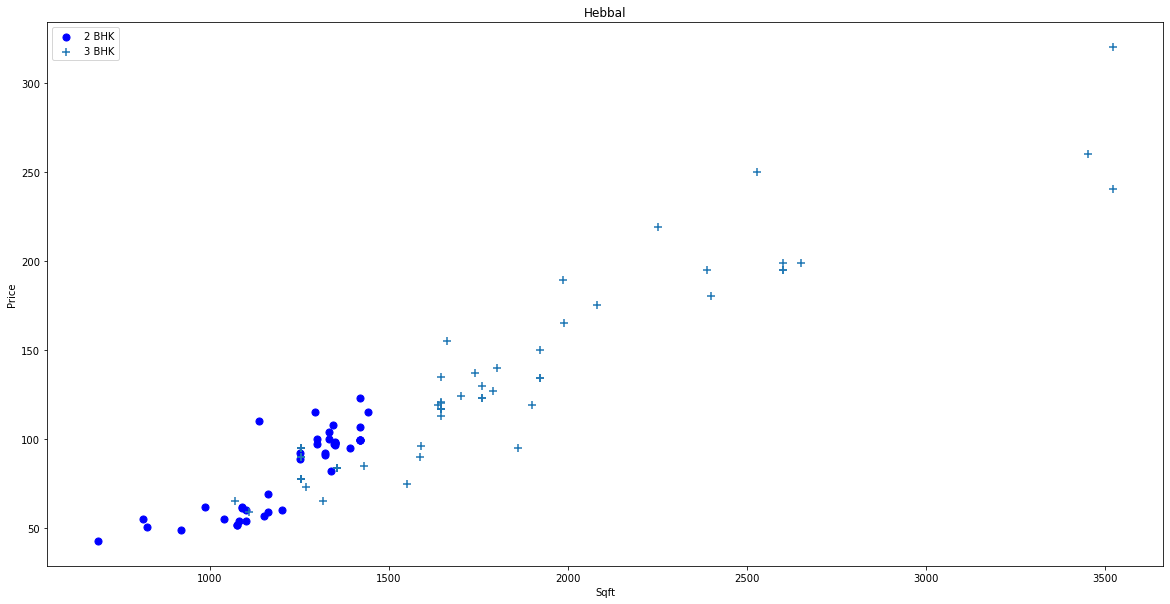

In [394]:
def plot_scatter_chart(df, location):
    bhk2= df[(df['location']==location) & (df['bhk']==2)]
    bhk3= df[(df['location']==location) & (df['bhk']==3)]
    #matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.sqft, bhk3.price, marker='+', label='3 BHK', s=50)
    plt.title(location)
    plt.xlabel("Sqft")
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7, 'Hebbal')

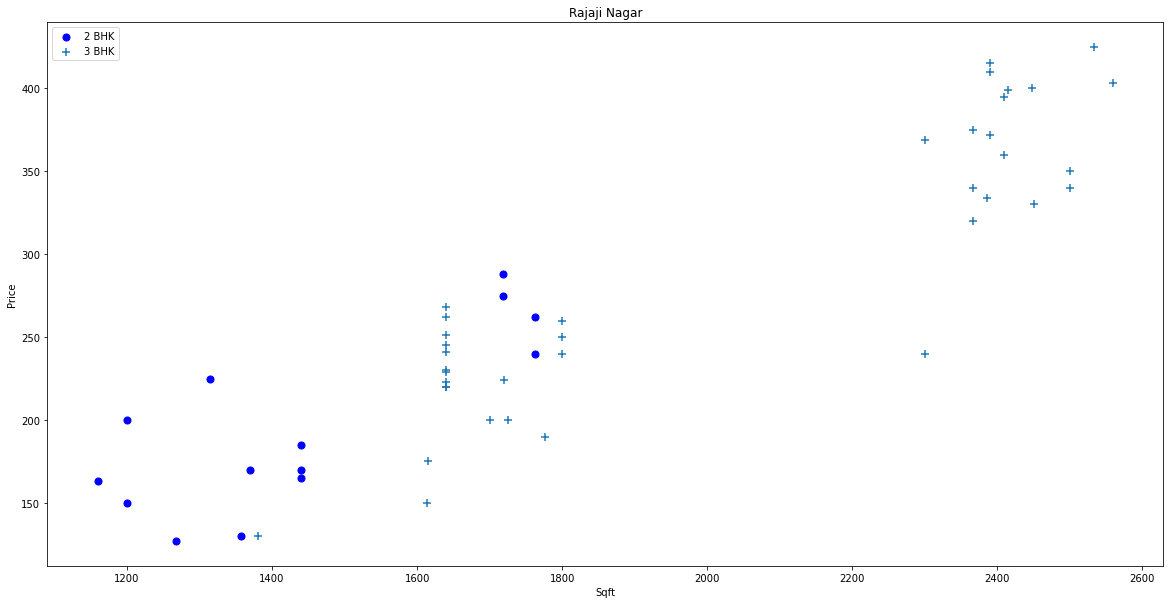

In [395]:
plot_scatter_chart(df7, 'Rajaji Nagar')

Here we can see price of 2 BHK homes are less than 3 Bhk homes, this could be because of many reasons

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [396]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape  

(7317, 7)

Visualizing same scatter plots

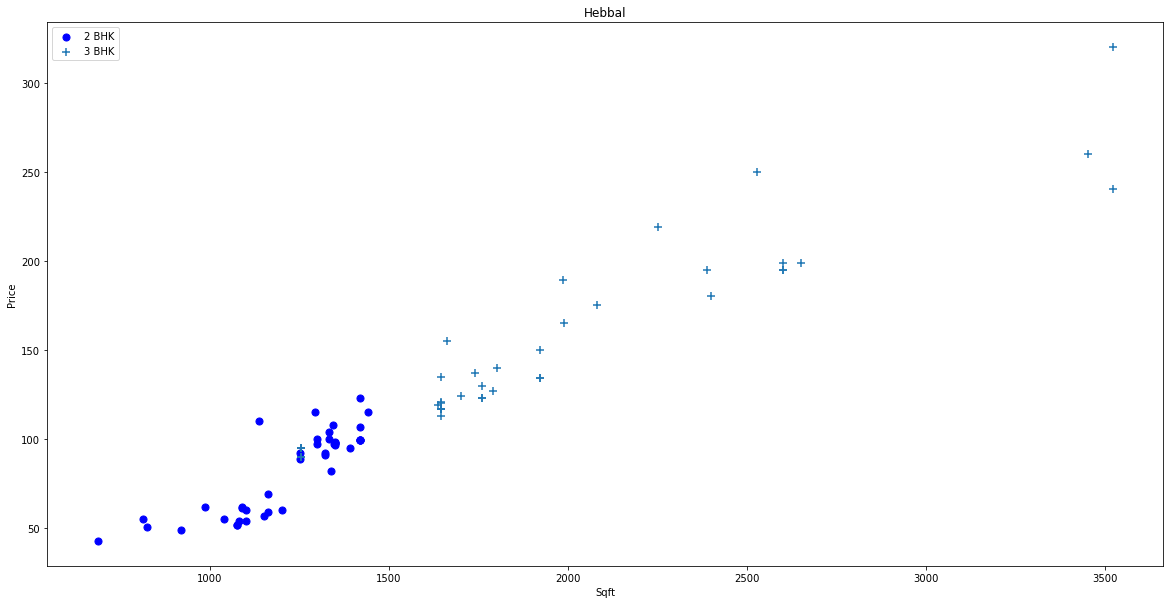

In [397]:
plot_scatter_chart(df8, 'Hebbal')

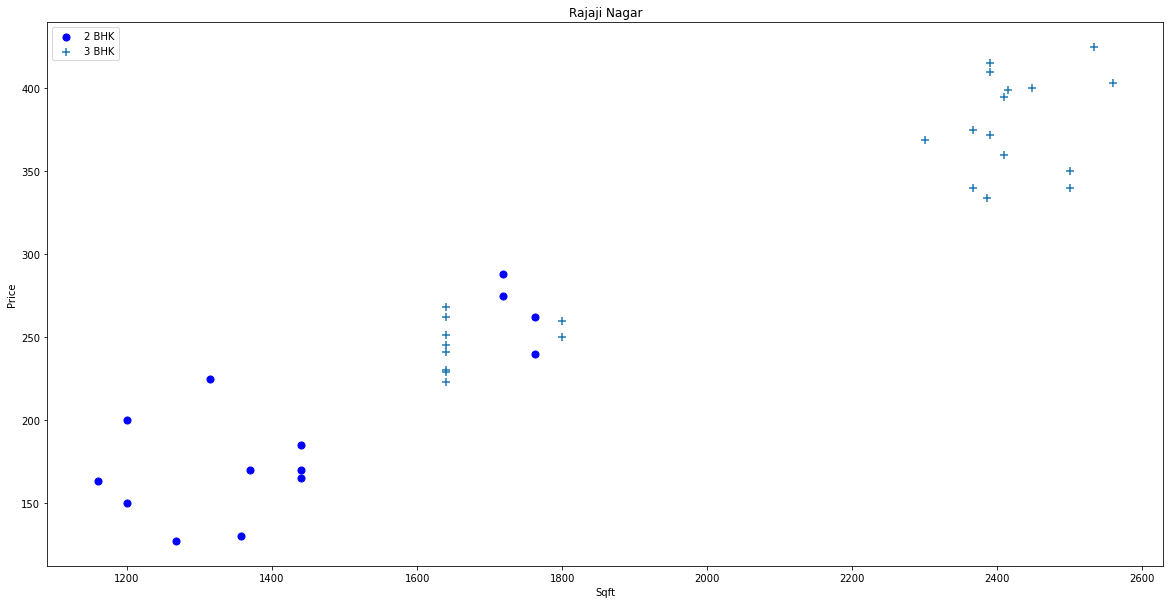

In [398]:
plot_scatter_chart(df8, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

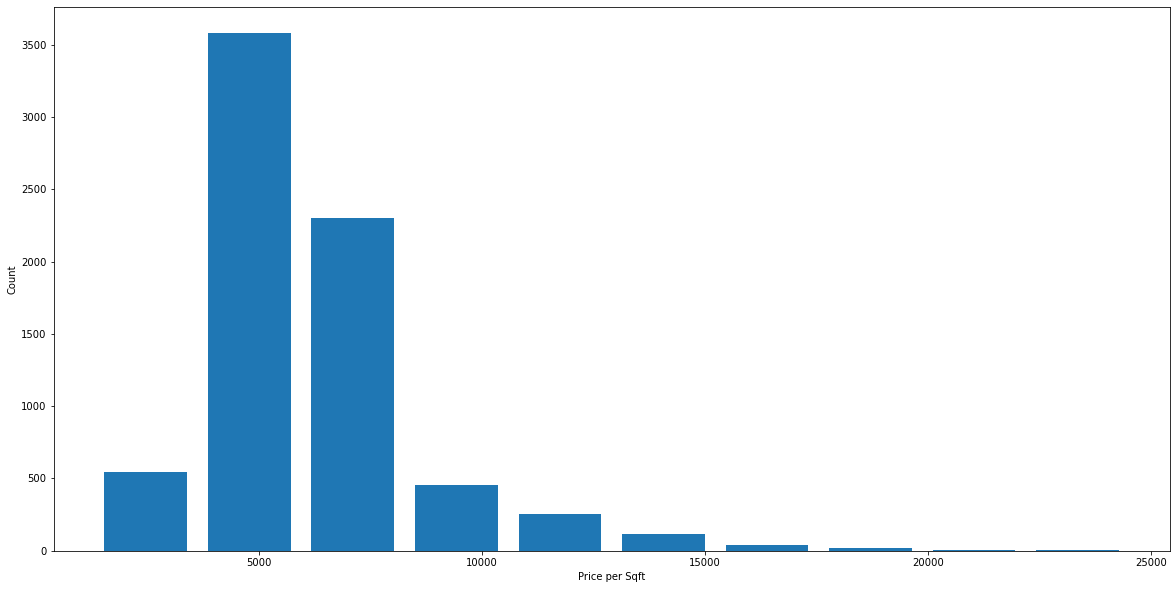

In [399]:
plt.hist(df8['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

In [404]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [405]:
df8[df8['bath']>10]

,location,total_sqft,bath,price,bhk,sqft,price_per_sqft
5277,Neeladri Nagar,4000,12.0,160.0,10,4000.0,4000.000000
8483,other,12000,12.0,525.0,10,12000.0,4375.000000
8572,other,10000,16.0,550.0,16,10000.0,5500.000000
9306,other,6000,12.0,150.0,11,6000.0,2500.000000
9637,other,5425,13.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'count')

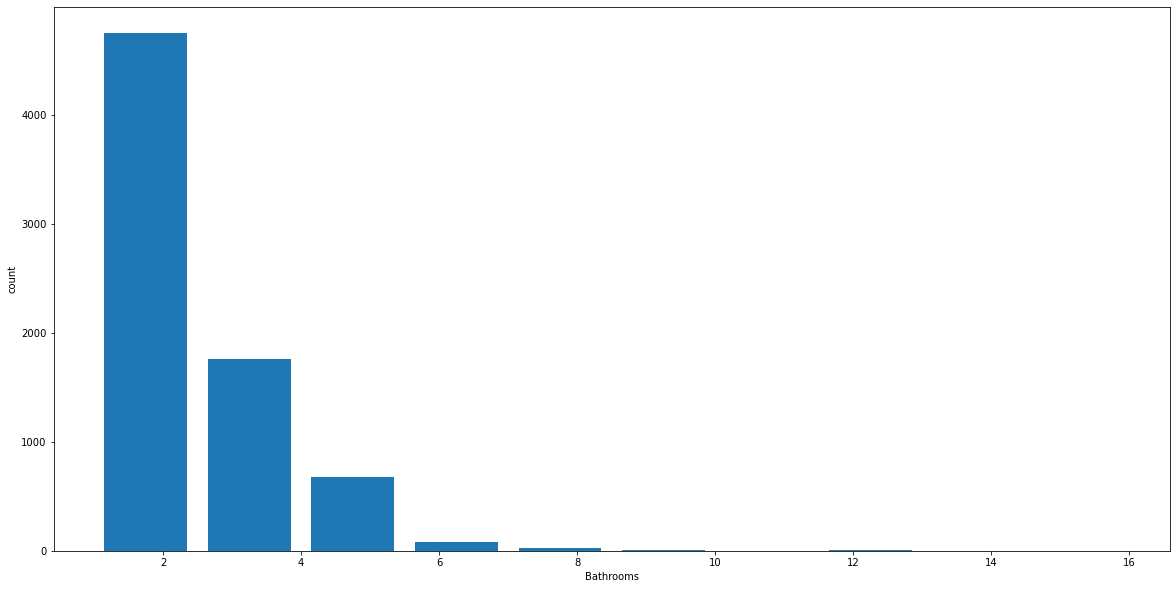

In [406]:
plt.hist(df8['bath'], rwidth=0.8)
plt.xlabel("Bathrooms")
plt.ylabel('count')

Removing all the rooms which have no.of bathrooms 2 more than no.of bedrooms. t is unusual to have 2 more bathrooms than number of bedrooms in a home

In [407]:
df8[df8['bath']>df8['bhk']+2]

,location,total_sqft,bath,price,bhk,sqft,price_per_sqft
1626,Chikkabanavar,2460,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,7000,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,1806,6.0,116.0,3,1806.0,6423.034330
8408,other,11338,9.0,1000.0,6,11338.0,8819.897689


In [408]:
df9=df8[df8['bath']<df8['bhk']+2]
df9.shape

(7239, 7)

In [411]:
df9.drop(['price_per_sqft','total_sqft'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [413]:
df9.groupby('bhk')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bhk,,,,,,,,
1,518.0,36.527838,26.852257,10.00,22.0000,32.805,42.38125,306.0
2,3626.0,62.213883,26.315384,17.00,45.2375,57.000,73.00000,288.0
3,2460.0,122.160892,73.288100,30.47,80.0075,104.000,135.00000,900.0
4,497.0,239.085775,156.003921,36.00,145.0000,200.000,290.00000,2100.0
5,67.0,247.432836,145.271660,65.00,140.0000,200.000,325.00000,720.0
6,39.0,229.307692,115.752948,68.00,155.0000,200.000,290.00000,560.0
7,9.0,402.777778,680.671135,85.00,125.0000,150.000,250.00000,2200.0
8,13.0,215.769231,129.419315,110.00,140.0000,180.000,225.00000,600.0
9,5.0,263.000000,135.166564,165.00,200.0000,210.000,240.00000,500.0


In [414]:
df9.head()

,location,bath,price,bhk,sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


For Location we need to hot encode

In [415]:
dummies=pd.get_dummies(df9['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [416]:
df10 = pd.concat([df9.drop('location', axis=1),dummies.drop('other', axis=1)], axis=1)
df10

,bath,price,bhk,sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2.0,70.0,2,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1.0,200.0,1,1800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,2.0,110.0,2,1353.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1.0,26.0,1,812.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Model

In [417]:
X = df10.drop('price', axis=1)
y = df10['price']

In [418]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [419]:
# Fitting models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8301712492111387

In [422]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

Trying various models using GridSearchCV

In [423]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': True}
1,lasso,0.726799,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.717298,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Testing the model with predict function

In [425]:
def predict_price(location,bath,bhk,sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

Some Price Predictions

In [429]:
predict_price('1st Phase JP Nagar', 2, 2,1000)

78.47908897253942

In [430]:
predict_price('1st Phase JP Nagar', 3, 3,1000)

72.21046881355177

In [431]:
predict_price('Indira Nagar', 3, 3,1000)

150.60733113410566

# Export the tested model to pickel file

In [434]:
import pickle
with open('banglore_real_estate_model.pickle','wb') as f:
    pickle.dump(lr,f)

Exporting location(one hot encoded) column file to use it for prediction in our application

In [438]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))